# Bike Sharing Demand

이번에는 워싱턴 DC의 Capital Bikeshare 프로그램에서 과거 사용 패턴과 날씨 데이터 등을 활용하여 자전거 대여 수요를 예측해보도록 하겠습니다.

캐글 : https://www.kaggle.com/c/bike-sharing-demand

아래 링크의 데이터 중에서 train 데이터를 다운받아서 파일이름을 b_train으로 바꾸고 주피터노트북의 data 폴더 안에 넣습니다.(과제 1 Titanic의 train데이터와 파일 이름이 겹치기 때문입니다.)

https://www.kaggle.com/c/bike-sharing-demand/data

In [49]:
import pandas as pd

In [50]:
import numpy as np

In [51]:
from scipy import stats

In [52]:
train = pd.read_csv('C:/Users/jdww2/Desktop/pandas/모듬파일 3/train.csv')

In [53]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [54]:
train.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


## 컬럼 설명
  - datetime - 시간
  - season - 1 = 봄, 2 = 여름, 3 = 가을, 4 = 겨울
  - holiday - 휴일 여부, 0 = 휴일이 아닌 날, 1 = 휴일
  - workingday - 근무일 여부, 0 = 근무일이 아닌 날, 1 = 근무일
  - weather - 1 : 맑음, 구름 조금, 흐림, 2 : 안개 + 흐림, 안개 + 깨진 구름, 안개 + 구름이 거의 없음, 안개, 3 : 가벼운 눈, 가벼운 비 + 뇌우 + 흩어진 구름, 가벼운 비 + 흩어진 구름, 4 : 폭우 + 얼음 팔레트 + 뇌우 + 안개, 눈 + 안개 
  - temp - 섭씨 온도
  - atemp - 체감 온도
  - humidity - 습도
  - windspeed - 풍속
  - casual - 비회원의 자전거 대여수
  - registered - 회원의 자전거 대여수
  - count - 전체 자전거 대여수 (casual+registered)

### 1. 데이터 분석을 위해 우선 각 컬럼의 데이터가 범주형 데이터인지, 수치형 데이터인지를 적어주세요~ 
- datetime : 범주
- season : 범주 
- holiday : 범주
- workingday : 범주
- weather : 범주
- temp : 수치
- atemp : 수치
- humidity : 수치
- windspeed : 수치

### 2.	train 데이터를 info() 함수를 살펴보겠습니다. 각 컬럼의 데이터 형태는 무엇인지, 각 컬럼의 데이터 개수는 몇 개인지, null값이 존재하는지 확인해주세요.

In [55]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


### 3. 수치형 데이터의 평균값, 중앙값, 표준편차를 확인하겠습니다.

In [56]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


### 4. 현재 Datetime 컬럼은 현재 문자 타입입니다. 날짜 타입으로 바꿔주세요.

In [57]:
train['datetime'] = pd.to_datetime(train['datetime'])

### 5.	5개의 컬럼을 생성해서 년, 월, 일, 시, 요일 데이터를 각각 넣도록 하겠습니다.

In [58]:
train['년'] = train['datetime'].dt.year
train['월'] = train['datetime'].dt.month
train['일'] = train['datetime'].dt.day
train['시'] = train['datetime'].dt.hour
train['요일'] = train['datetime'].dt.dayofweek

In [59]:
%matplotlib inline

import seaborn as sns

import matplotlib.pyplot as plt

# plt.rcParams['font.family'] = 'NanumGothic'

plt.rcParams['figure.figsize'] = (18, 8)

import warnings 
warnings.filterwarnings('ignore')

이번 프로젝트의 미션은 여러분 스스로 판다스와 시각화 기능을 활용하여 가설을 검증합니다.

다음 주어진 4개의 가설의 검증해주세요

In [60]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count', '년',
       '월', '일', '시', '요일'],
      dtype='object')

In [61]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,년,월,일,시,요일
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,5


### 6. 가설 1] 24시간 중에 자전거 대여량이 많은 시간대가 존재한다.

<AxesSubplot:xlabel='시', ylabel='count'>

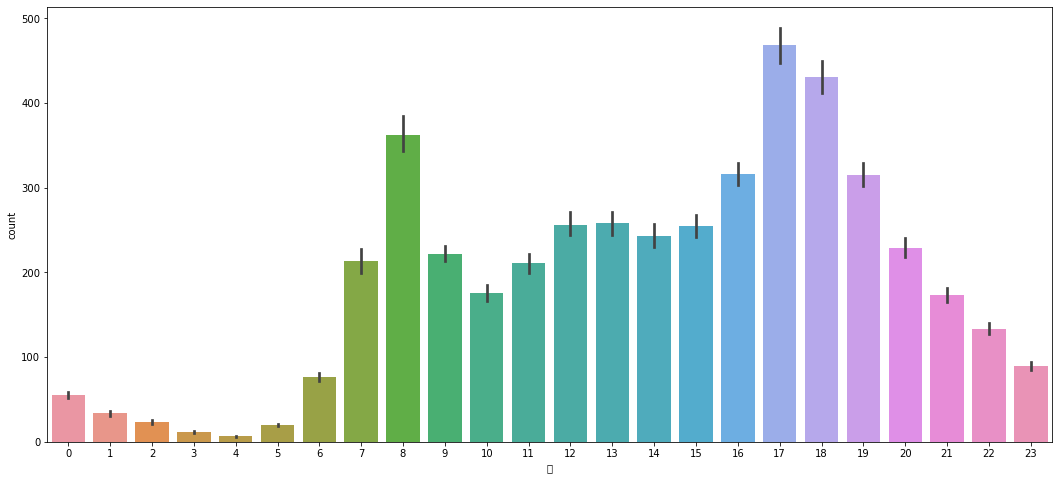

In [62]:
sns.barplot(data = train, x = '시', y = 'count')

<AxesSubplot:xlabel='시', ylabel='count'>

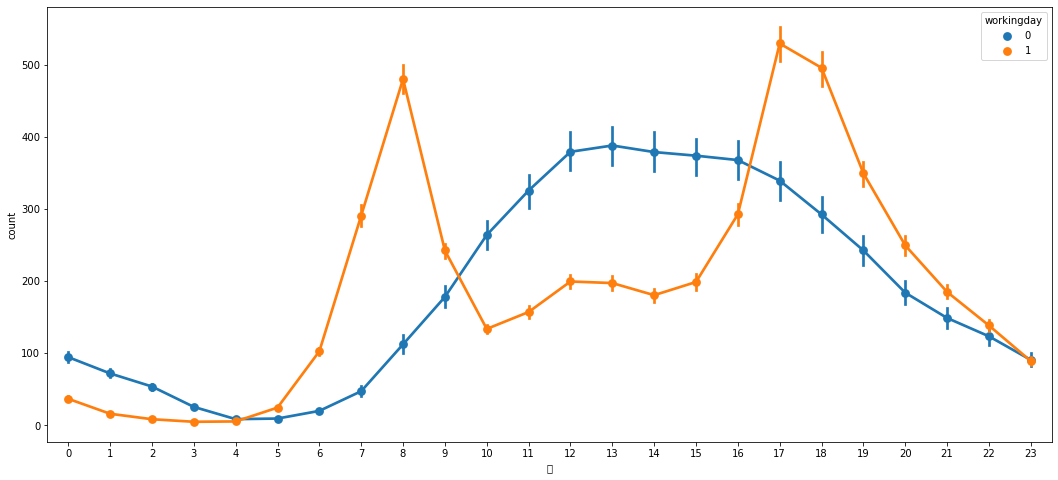

In [63]:
sns.pointplot(data = train, x = '시', y = 'count', hue = 'workingday')

<AxesSubplot:xlabel='시', ylabel='count'>

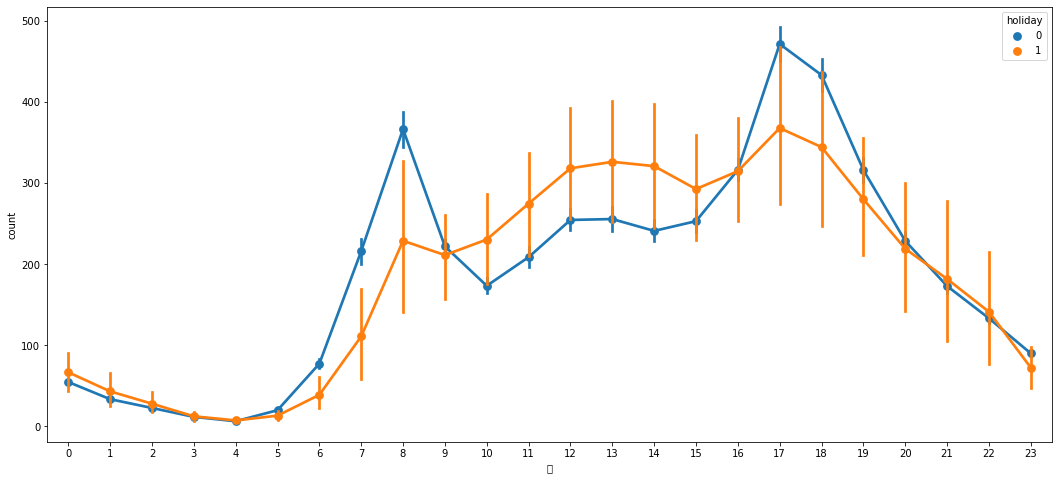

In [64]:
sns.pointplot(data = train, x = '시', y = 'count', hue = 'holiday')

- 24시간 중 대여량이 가장 많은 시간은 오전에는 8시 오후에는 17-18시가 많다.
- 근무일을 기준으로 한 데이터와 대여량이 많은 시간대가 일치함을 볼 수 있다.

### 7. 가설 2] 주말과 공휴일의 자전거 대여량과 평일, 비공휴일의 자전거 대여량이 다르다.

In [65]:
# 그래프 설정을 위해서 matplotlib 모듈을 불러옵니다.

import matplotlib as mlp

<AxesSubplot:xlabel='시', ylabel='count'>

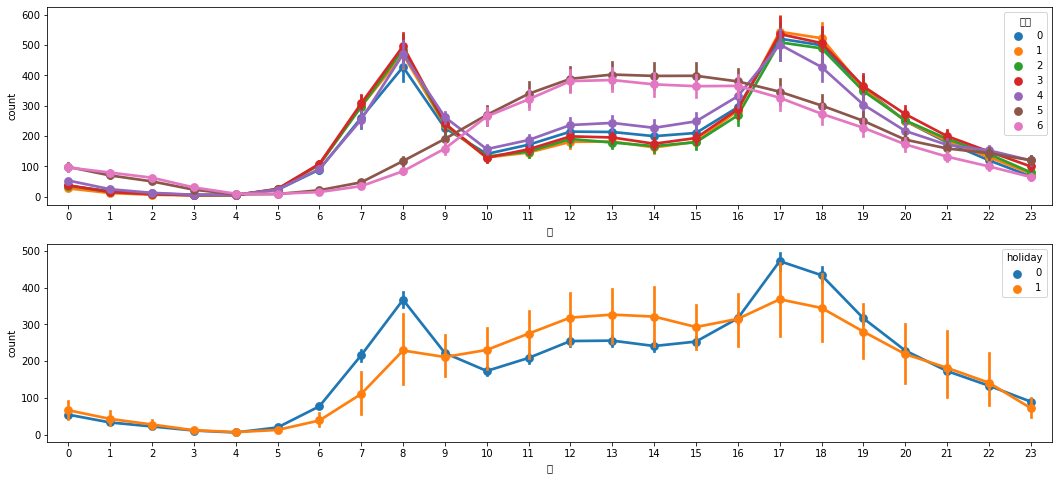

In [66]:
# workingday 0 주말
# holiday 1 공휴일
figure, (ax1, ax2) = plt.subplots(nrows = 2)
figure.set_size_inches(18, 8)
mlp.rcParams['font.size'] = 10

sns.pointplot(data = train, x = '시', y = 'count',hue = '요일' ,ax = ax1)
sns.pointplot(data = train, x = '시', y = 'count',hue = 'holiday' ,ax =ax2)

<AxesSubplot:xlabel='시', ylabel='count'>

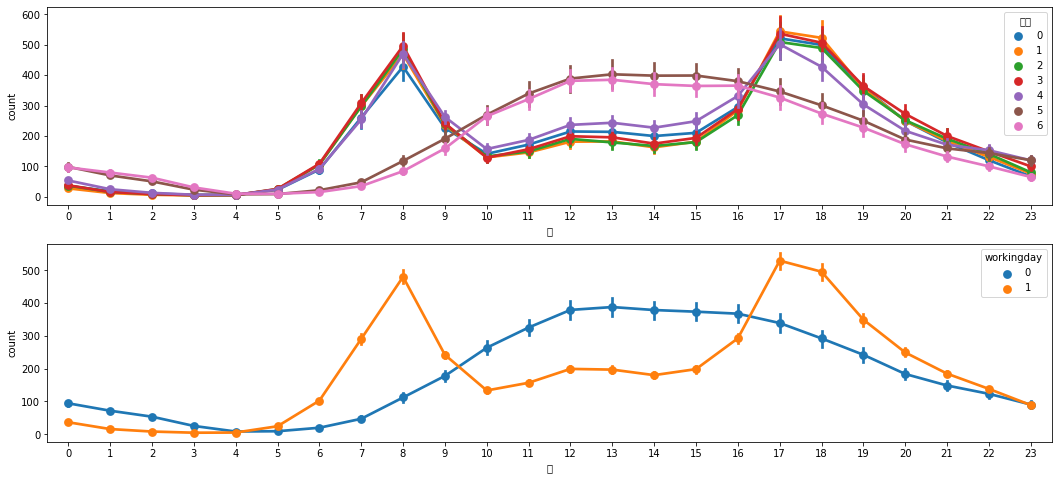

In [67]:
# workingday 0 주말
# holiday 1 공휴일
figure, (ax1, ax2) = plt.subplots(nrows = 2)
figure.set_size_inches(18, 8)
mlp.rcParams['font.size'] = 10

sns.pointplot(data = train, x = '시', y = 'count',hue = '요일' ,ax = ax1)
sns.pointplot(data = train, x = '시', y = 'count',hue = 'workingday' ,ax =ax2)

- 주말과 공휴일의 자전거 대여량은 시간대에 따라 앞서거나 뒤쳐지거나 하는 부분이 있지만 분산의 정도를 보아 외부적 환경요인에 따른 것으로 파악된다. (추가적으로 날씨, 온도, 습도에 따른 부분으로 확인해보자.)

- 평일과 비공휴일의 자전거 대여량은 비슷한 대여량으로 확인이 된다.

### 8. 가설 3] 자전거를 타기 좋은 월(3~10월)의 자전거 대여량이 많을 것이다.

<AxesSubplot:xlabel='월', ylabel='count'>

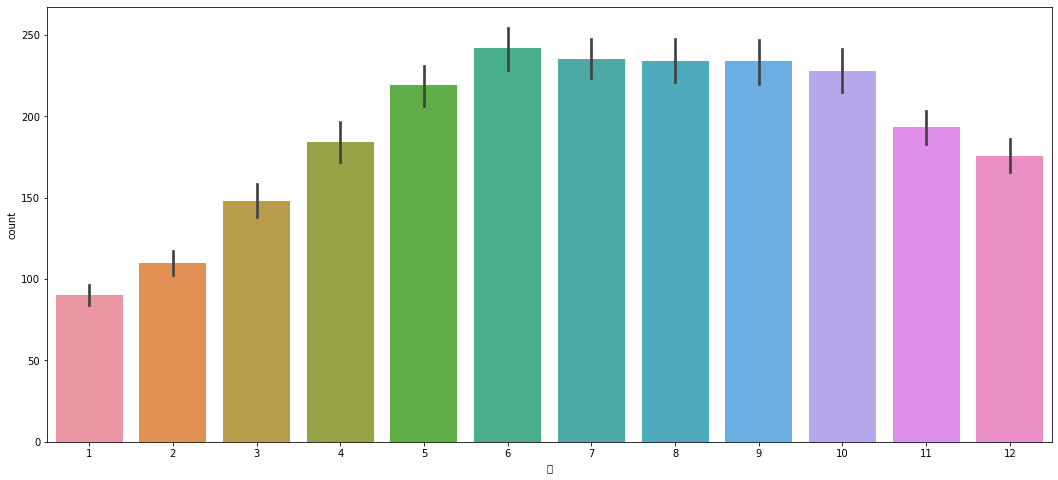

In [68]:
sns.barplot(data = train, x = '월', y = 'count')

- 3~10월 중 3,4월의 대여량보다 11,12월의 대여량이 많음을 알 수 있다.
- 전체 년,월의 데이터를 확인해보자.

In [69]:
train['년월'] = train['년'].astype('str')+'-'+train['월'].astype('str')

<AxesSubplot:xlabel='년월', ylabel='count'>

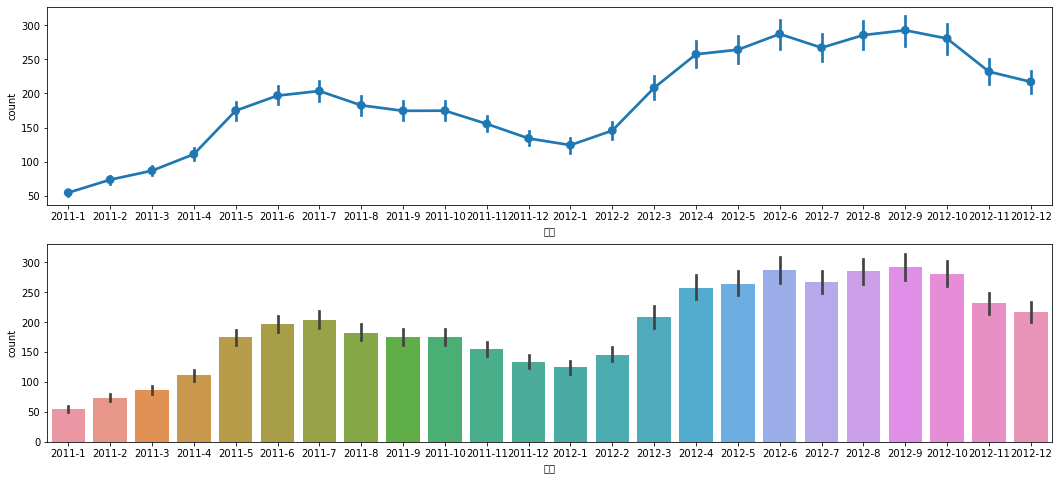

In [70]:
figure, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1)
figure.set_size_inches(18, 8)
mlp.rcParams['font.size'] = 10

sns.pointplot(data = train, x = '년월', y= 'count', ax = ax1)
sns.barplot(data = train, x = '년월', y= 'count', ax = ax2)

<AxesSubplot:xlabel='season', ylabel='count'>

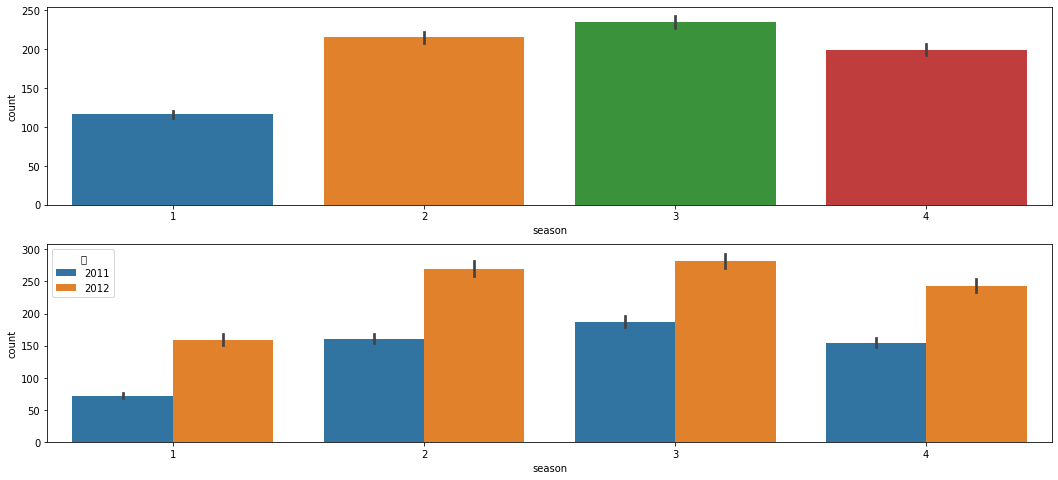

In [71]:
figure, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1)
figure.set_size_inches(18, 8)
mlp.rcParams['font.size'] = 10


sns.barplot(data = train, x = 'season', y = 'count', ax = ax1)
sns.barplot(data = train, x = 'season', y = 'count', hue = '년', ax = ax2)

- 11년에 비해 전체적으로 12년의 이용객 수는 상승 했음을 볼 수 있다.
- 계절에 따른 이용객 수는 가을 > 여름 > 겨울 > 봄 으로 확인이 된다.

- 11년의 경우는 3,4월 보다 11,12 의 이용객이 많지만 12년의 경우 3,4월과 11,12월이 이용객은 비슷한 수준을 나타낸다.
- 이는 날씨 습도, 기온의 영향에 따른 변수 예측이 필요해보인다.

### 9. 가설 4] 온도, 체감온도, 습도, 풍속 등을 포함한 날씨 데이터는 자전거 대여량에 많은 영향을 끼칠 것이다.

In [72]:
corr_fac = train[["temp", "atemp", "humidity", "windspeed", "casual", "registered", "count"]].corr()
corr_fac 

,temp,atemp,humidity,windspeed,casual,registered,count
temp,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948
count,0.394454,0.389784,-0.317371,0.101369,0.690414,0.970948,1.000000


<AxesSubplot:>

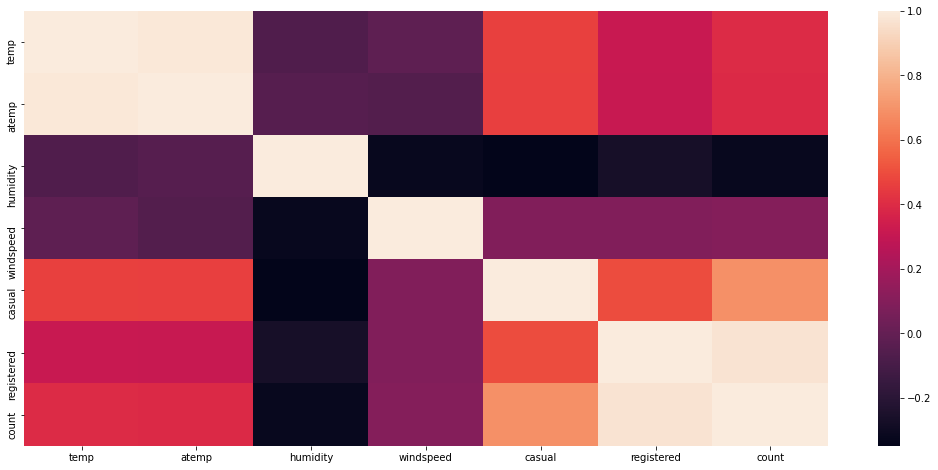

In [73]:
sns.heatmap(corr_fac)

- heatmap 에서는 대여량과 온도 풍속 습도와의 연관성은 없다고 판단된다.

<AxesSubplot:xlabel='humidity', ylabel='count'>

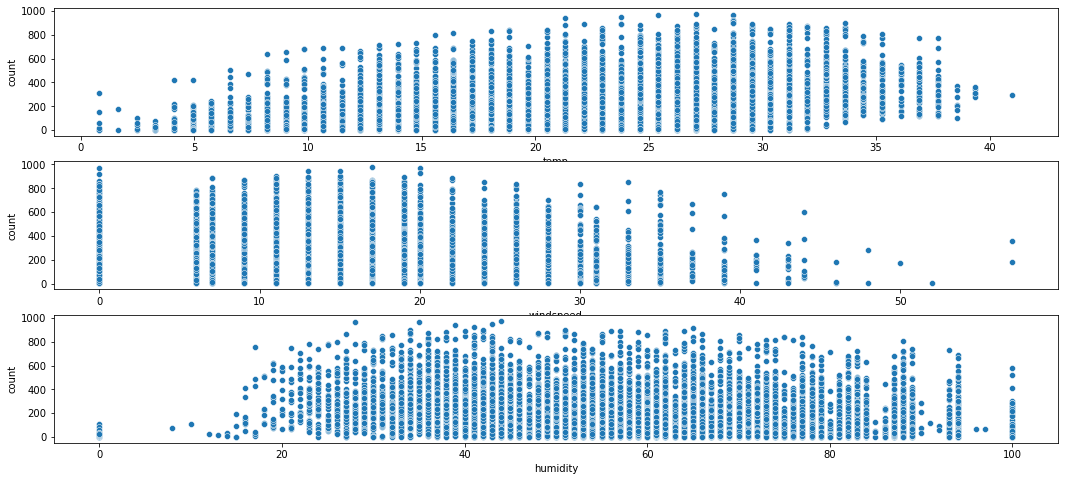

In [74]:
figure, ((ax1), (ax2), (ax3)) = plt.subplots(nrows = 3, ncols = 1)
figure.set_size_inches(18, 8)
mlp.rcParams['font.size'] = 10

sns.scatterplot(data = train, x = 'temp', y = 'count', ax = ax1)

sns.scatterplot(data = train, x = 'windspeed', y = 'count', ax = ax2)

sns.scatterplot(data = train, x = 'humidity', y = 'count', ax = ax3)

- 풍속의 경우 0에 데이터가 몰려있는 것을 확인할 수 있으며 이는 결측값을 0 으로 기록한 것으로 추정된다,
- 습도의 경우 0, 100에 마찬가지로 기록한 것으로 추정되기에 수정이 필요된다.

In [75]:
# trainWithoutOutliers
# train count 의 이상치 제거.
trainWithoutOutliers = train[np.abs(train["count"] - train["count"].mean()) <= (3*train["count"].std())]

train.shape
trainWithoutOutliers.shape

# 식 이해 안됨.........................................

(10739, 18)

((array([-3.82819677, -3.60401975, -3.48099008, ...,  3.48099008,
          3.60401975,  3.82819677]),
  array([0.69314718, 0.69314718, 0.69314718, ..., 6.5971457 , 6.59850903,
         6.5998705 ])),
 (1.3486990121229776, 4.562423868087808, 0.9581176780909612))

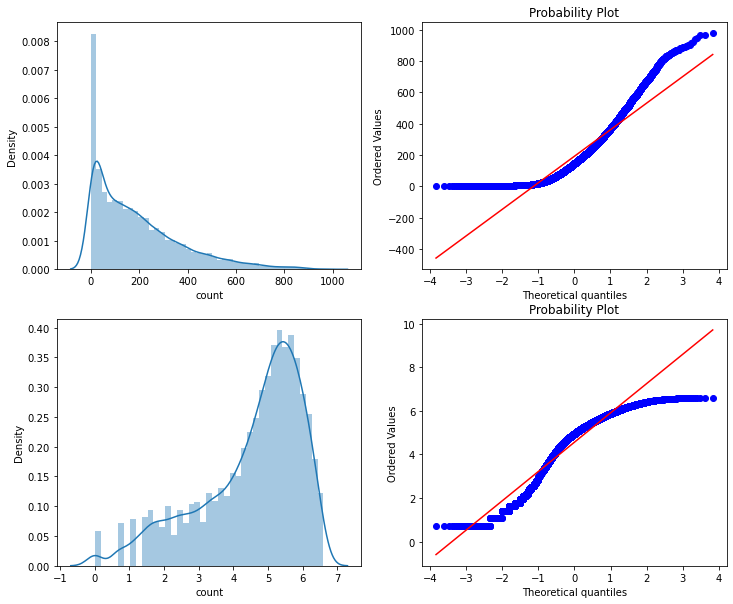

In [76]:
# 제거한 데이터로 distplot, probplot로 그려봐서 제거 전과 비교
figure, axes = plt.subplots(ncols=2, nrows=2)
figure.set_size_inches(12, 10)

sns.distplot(train["count"], ax=axes[0][0])
stats.probplot(train["count"], dist='norm', fit=True, plot=axes[0][1])
sns.distplot(np.log(trainWithoutOutliers["count"]), ax=axes[1][0])
stats.probplot(np.log1p(trainWithoutOutliers["count"]), dist='norm', fit=True, plot=axes[1][1])

# probplot 은 빨간선에 붙어잇을수록 정규분포가 되엇다는 것을 의미한다
# 이전 데이터보다는 수정 데이터가 오른쪽에 치우쳐져 있지만 비교적 정확하다는 것을 알 수 있다.

In [77]:
### 이제부터 어렵다리..

- plan A : 환경요인의 결측값을 평균으로 수치화
- plan B : 환경요인의 결측값을 머신러닝으로 예측해서 수치화

In [78]:
train = pd.read_csv('C:/Users/jdww2/Desktop/pandas/모듬파일 3/train.csv', parse_dates = ['datetime'])
test = pd.read_csv('C:/Users/jdww2/Desktop/pandas/모듬파일 3/test.csv', parse_dates = ['datetime'])

In [79]:
train['년'] = train['datetime'].dt.year
train['월'] = train['datetime'].dt.month
train['일'] = train['datetime'].dt.day
train['시'] = train['datetime'].dt.hour
train['요일'] = train['datetime'].dt.dayofweek

In [80]:
test['년'] = train['datetime'].dt.year
test['월'] = train['datetime'].dt.month
test['일'] = train['datetime'].dt.day
test['시'] = train['datetime'].dt.hour
test['요일'] = train['datetime'].dt.dayofweek

<AxesSubplot:xlabel='windspeed', ylabel='count'>

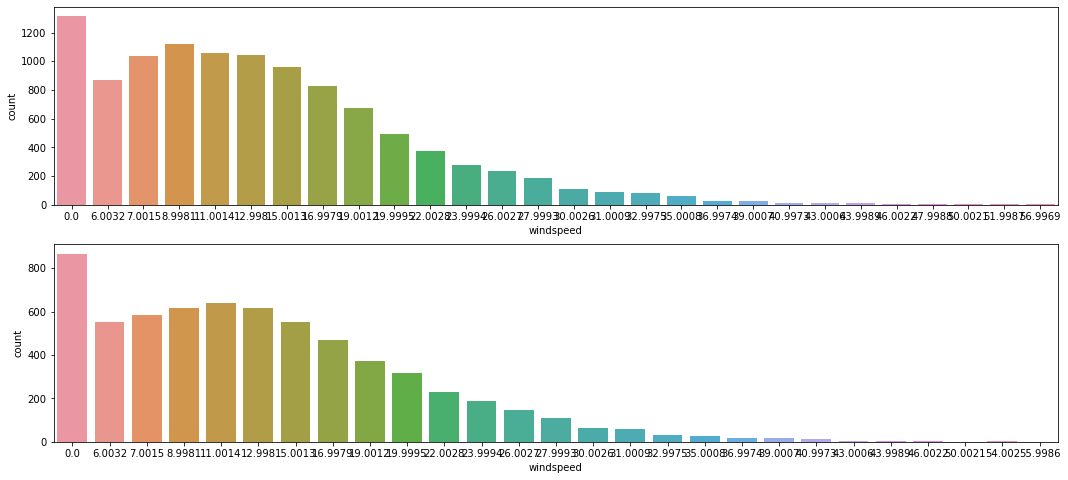

In [81]:
figure, ((ax1), (ax2)) = plt.subplots(nrows = 2, ncols = 1)
figure.set_size_inches(18, 8)
mlp.rcParams['font.size'] = 10

sns.countplot(data = train, x = 'windspeed', ax = ax1)

sns.countplot(data = test, x = 'windspeed', ax = ax2)


-# plan A
train['windspeed'].mean()
train.loc[train['windspeed']==0, "windspeed"] = train['windspeed'].mean()

test['windspeed'].mean()
test.loc[train['windspeed']==0, "windspeed"] = test['windspeed'].mean()
-# plan A 풍속의 결측값을 평균으로 치환.
-# 습도의 경우도 마찬가지로 적용하면 됨.

In [82]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count', '년',
       '월', '일', '시', '요일'],
      dtype='object')

In [83]:
# plan B : 머신러닝으로 풍속 예측.

from sklearn.ensemble import RandomForestClassifier

def predict_windspeed(data):
    
    # 풍속을 0 과 0이 아닌 것으로 나눈다.
    datawind0 = data.loc[data['windspeed']==0]
    datawindnot0 = data.loc[data['windspeed']!=0]
    
    # 풍속을 예측할 피쳐(영향을 줄 열)를 선택한다.
    wcols = ['temp', 'atemp', 'season', 'weather', 'humidity', '년', '월']
    
    # 풍속이 0이 아닌 데이터들을 스트링으로 바꿔준다. (머신러닝 사용법인듯.)
    datawindnot0['windspeed'] = datawindnot0['windspeed'].astype('str')
    
    # 랜덤포레스트 분류기 사용.
    rfModel_wind = RandomForestClassifier()
    
    # wcols 에 있는 피쳐의 값들을 바탕으로 풍속을 학습한다. (배우고)
    rfModel_wind.fit(datawindnot0[wcols], datawindnot0['windspeed'])
    
    # 학습된 값을 바탕으로 0으로 기록된 풍속을 예측한다.    (0인 값에 적용)
    wind0values = rfModel_wind.predict(X = datawind0[wcols])
    
    # 값을 다 예측 후 비교하기 위해 예측한 값을 넣어줄 데이터프레임을 새로 만든다.  (검증인듯?) (왜있는거지??)
    
    predictwind0 = datawind0              # 얜 그냥 끼워넣기인듯?
    predictwindnot0 = datawindnot0        # 예측값을 새로운 데이터프레임 적용
    
    # 값이 0으로 기록된 풍속에 예측한 풍속의 값을 넣어준다. 
    predictwind0['windspeed'] = wind0values
    
    # 0이 아닌 풍속이 있는 데이터프레임에 예측한 값이 있는 데이터프레임을 합쳐준다.
    data = predictwindnot0.append(predictwind0)
    
    # 풍속의 데이터타입을 float로 전환. (데이터 형식 복구)
    data['windspeed'] = data['windspeed'].astype('float')
    
    data.reset_index(inplace = True)
    data.drop('index', inplace = True, axis = 1)
    
    return data 
# 어렵당..

<AxesSubplot:xlabel='windspeed', ylabel='count'>

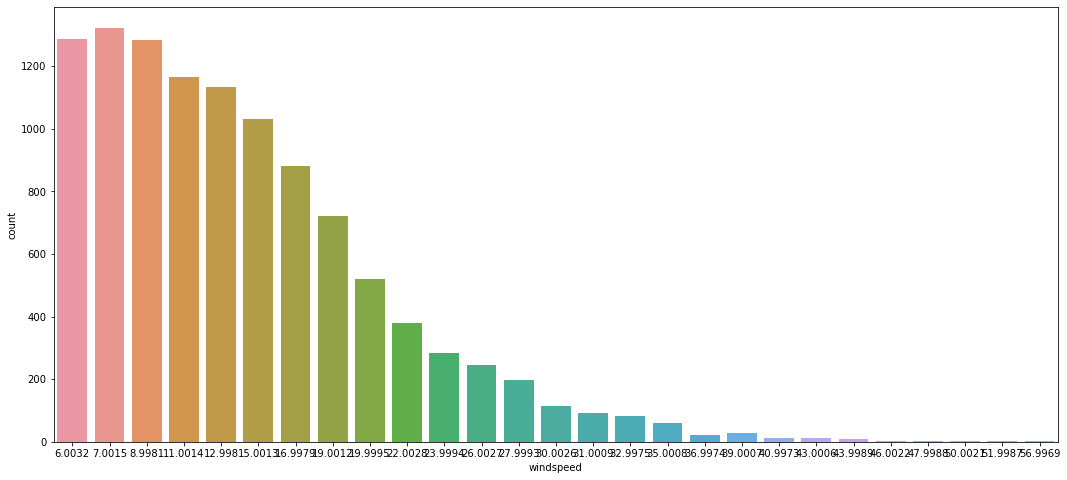

In [84]:
# 0 값을 조정한다.
train = predict_windspeed(train)
#test = predict_windspeed(test)

# windspeed 의 0 값을 조정한 데이터를 시각화.
figure, ax1 = plt.subplots()
figure.set_size_inches(18,8)

sns.countplot(data = train, x = 'windspeed', ax = ax1)

- 0인 값을 렌덤포레스트로 예측된 값을 넣어 주었다. 0인 데이터가 없어졌음을 확인 할 수 있다.